In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import openpyxl
import seaborn as sns
from scipy.stats import zscore, shapiro, kstest
from sklearn.impute import KNNImputer

In [2]:
argentina = pd.read_csv("COVID19ARGENTINA.csv", index_col=0)
colombia = pd.read_csv("COVID19COLOMBIA.csv", index_col=0)
mexico = pd.read_csv("COVID19MEXICO.csv", index_col=0)
peru = pd.read_csv("COVID19PERU.csv", index_col=0)

In [3]:
latam = pd.concat([argentina,colombia,mexico,peru])

In [4]:
# Some data are still missing the desiredformat
latam.Sexo.unique()

array(['M', 'F', 'NR', 'm', 'f'], dtype=object)

In [5]:
# There are some impossible values in here
sorted(list(latam.Edad.unique()))

[-84.0,
 -7.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 84.0,
 88.0,
 89.0,
 92.0,
 nan,
 81.0,
 82.0,
 83.0,
 85.0,
 86.0,
 87.0,
 90.0,
 91.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 135.0,
 136.0,
 

In [6]:
# The number of missing data in the age column is not that worrisome
latam[latam.Edad.isna()]

,Sexo,Edad,Estado,Municipio,Fecha de inicio de síntomas,País
603,NR,NaN,Córdoba,San Justo,NaN,Argentina
3832,NR,NaN,CABA,COMUNA 07,NaN,Argentina
5339,NR,NaN,Buenos Aires,La Plata,NaN,Argentina
6570,NR,NaN,Buenos Aires,Berazategui,2021-04-01,Argentina
10615,NR,NaN,Buenos Aires,Almirante Brown,NaN,Argentina
...,...,...,...,...,...,...
4474616,M,NaN,LIMA,LIMA,2021-02-03,Perú
4474625,M,NaN,LIMA,LIMA,2021-02-24,Perú
4475933,M,NaN,LIMA,LIMA,2021-03-03,Perú
4485110,M,NaN,TRUJILLO,LA LIBERTAD,2021-05-18,Perú


In [7]:
# Let's homogenize the capitalizing standard, and translate those numbers
latam.Estado.unique()

array(['CABA', 'Buenos Aires', 'Santa Fe', 'Entre Ríos',
       'Tierra del Fuego', 'Córdoba', 'San Luis', 'Río Negro', 'Mendoza',
       'Santa Cruz', 'Corrientes', 'La Pampa', 'SIN ESPECIFICAR', 'Chaco',
       'Formosa', 'Salta', 'Neuquén', 'Misiones', 'Santiago del Estero',
       'Tucumán', 'Chubut', 'San Juan', 'Catamarca', 'La Rioja', 'Jujuy',
       'VALLE', 'ANTIOQUIA', 'SANTANDER', 'NORTE SANTANDER', 'CALDAS',
       'BOGOTA', 'CUNDINAMARCA', 'CAQUETA', 'QUINDIO', 'RISARALDA',
       'CASANARE', 'NARIÑO', 'HUILA', 'CESAR', 'META', 'STA MARTA D.E.',
       'TOLIMA', 'CAUCA', 'BARRANQUILLA', 'SUCRE', 'CARTAGENA', 'BOLIVAR',
       'GUAJIRA', 'ATLANTICO', 'CORDOBA', 'MAGDALENA', 'ARAUCA', 'BOYACA',
       'CHOCO', 'GUAVIARE', 'SAN ANDRES', 'VICHADA', 'PUTUMAYO', 'VAUPES',
       'GUAINIA', 'AMAZONAS', 'Caldas', 'Tolima', 'Santander',
       'Cundinamarca', 24, 14, 8, 9, 1, 7, 19, 15, 31, 27, 18, 13, 12, 29,
       22, 2, 26, 32, 4, 21, 23, 5, 17, 20, 10, 3, 30, 6, 11, 28, 16, 25

In [8]:
# Same in hre
latam.Municipio.unique()

array(['SIN ESPECIFICAR', 'Lomas de Zamora', 'La Matanza', ..., 'UCAYALI',
       'APURIMAC', 'MADRE DE DIOS'], dtype=object)

In [9]:
# And think about a way of dealing with these many missing values
latam[latam["Fecha de inicio de síntomas"].isna()]

,Sexo,Edad,Estado,Municipio,Fecha de inicio de síntomas,País
0,M,55.0,CABA,SIN ESPECIFICAR,NaN,Argentina
1,F,53.0,CABA,SIN ESPECIFICAR,NaN,Argentina
3,F,45.0,Buenos Aires,La Matanza,NaN,Argentina
4,F,34.0,CABA,COMUNA 01,NaN,Argentina
5,F,33.0,CABA,COMUNA 08,NaN,Argentina
...,...,...,...,...,...,...
29971986,M,37.0,CABA,SIN ESPECIFICAR,NaN,Argentina
29971987,F,50.0,Buenos Aires,La Matanza,NaN,Argentina
29971988,M,56.0,Neuquén,Confluencia,NaN,Argentina
29971990,F,53.0,CABA,SIN ESPECIFICAR,NaN,Argentina


In [10]:
latam['Sexo'] = latam['Sexo'].str.upper().replace({'M': 'Masculino', 'F': 'Femenino', 'NR': 'No Responde'})

In [11]:
# Convert negative ages to positive as they were most likely a sign error
latam['Edad'] = latam['Edad'].apply(lambda x: abs(x) if x < 0 else x)

# Discard impossible values
latam = latam[(latam['Edad'] <= 120)]

In [12]:
# We'll use a simple imputation technique with a machine learning namely the K-Nearest Neighbors (KNN) method for imputation:
imputer = KNNImputer(n_neighbors=5)
latam[['Edad']] = imputer.fit_transform(latam[['Edad']])

In [13]:
data_dict = pd.ExcelFile('dataDictionary.xlsx')  # 201128 Catalogos.xlsx
entidades_df = pd.read_excel(data_dict, sheet_name='Catálogo de ENTIDADES')

In [14]:
estado_dict = dict(zip(entidades_df['CLAVE_ENTIDAD'], entidades_df['ENTIDAD_FEDERATIVA']))

def map_estado(value):
    try:
        return estado_dict[int(value)]
    except (ValueError, KeyError):
        return value

latam['Estado'] = latam['Estado'].apply(map_estado)
latam['Estado'] = latam['Estado'].str.title()

In [15]:
latam["Fecha de inicio de síntomas"] = pd.to_datetime(latam["Fecha de inicio de síntomas"])

In [16]:
latam.dropna(inplace=True)

In [17]:
summary_stats = latam.describe(include='all')
print(summary_stats)

            Sexo          Edad            Estado Municipio  \
count   37088819  3.708882e+07          37088819  37088819   
unique         3           NaN               286      2091   
top     Femenino           NaN  Ciudad De México      LIMA   
freq    19806258           NaN           6063609   1638986   
mean         NaN  3.886363e+01               NaN       NaN   
min          NaN  0.000000e+00               NaN       NaN   
25%          NaN  2.600000e+01               NaN       NaN   
50%          NaN  3.700000e+01               NaN       NaN   
75%          NaN  5.000000e+01               NaN       NaN   
max          NaN  1.200000e+02               NaN       NaN   
std          NaN  1.783819e+01               NaN       NaN   

          Fecha de inicio de síntomas      País  
count                        37088819  37088819  
unique                            NaN         4  
top                               NaN    México  
freq                              NaN  19146932  
mean 

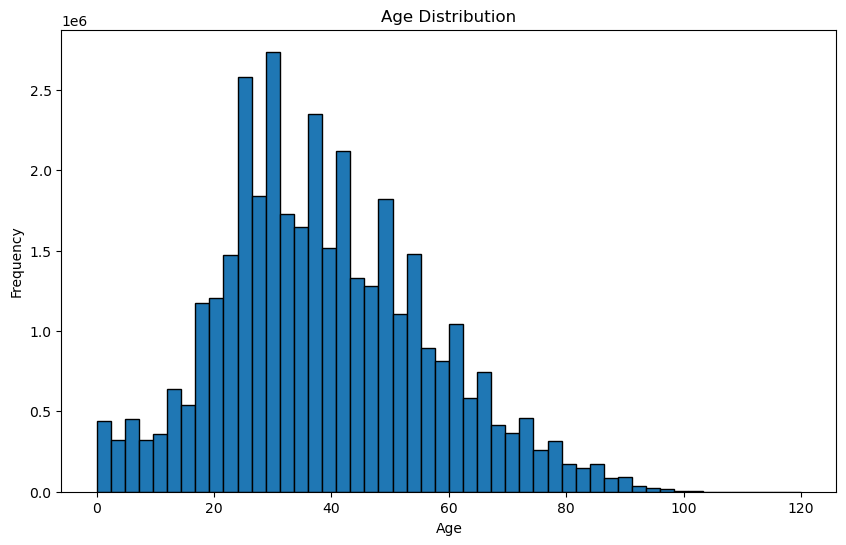

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(latam['Edad'], bins=50, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

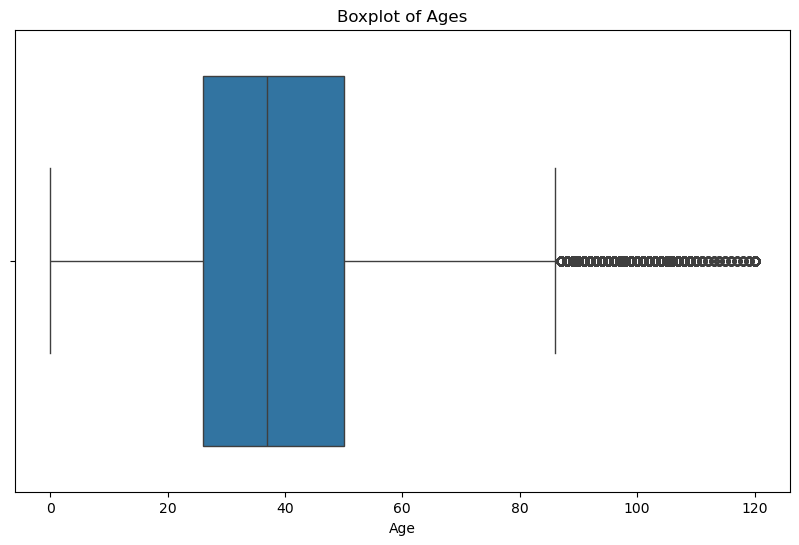

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=latam['Edad'])
plt.title('Boxplot of Ages')
plt.xlabel('Age')
plt.show()

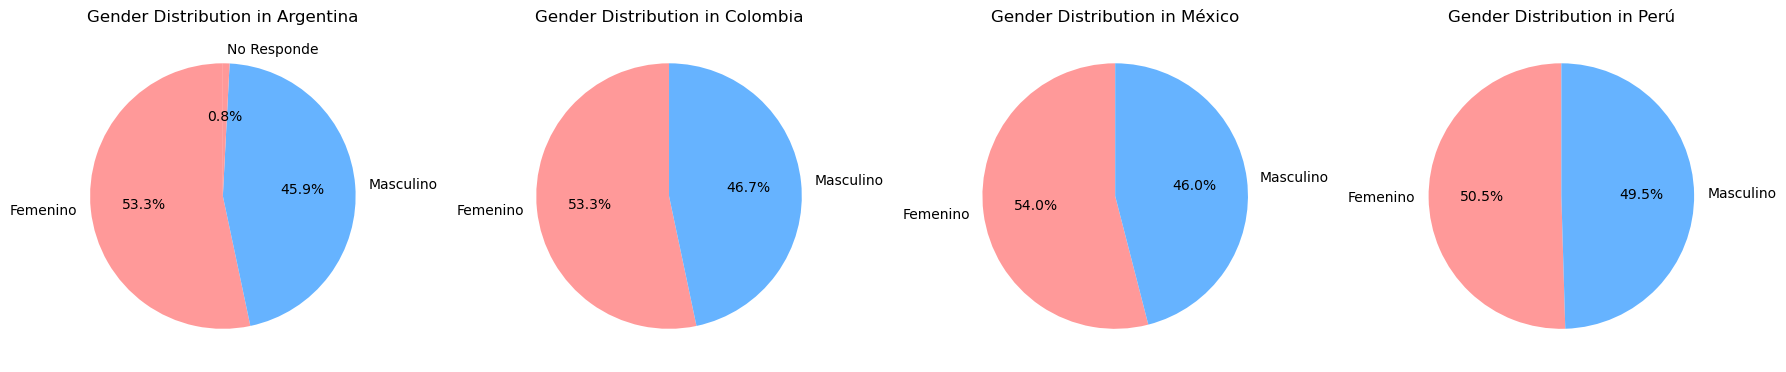

In [20]:
countries = latam['País'].unique()

fig, axs = plt.subplots(1, len(countries), figsize=(18, 6))

for i, country in enumerate(countries):
    data = latam[latam['País'] == country]['Sexo'].value_counts()
    axs[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
    axs[i].set_title(f'Gender Distribution in {country}')

plt.tight_layout()
plt.show()

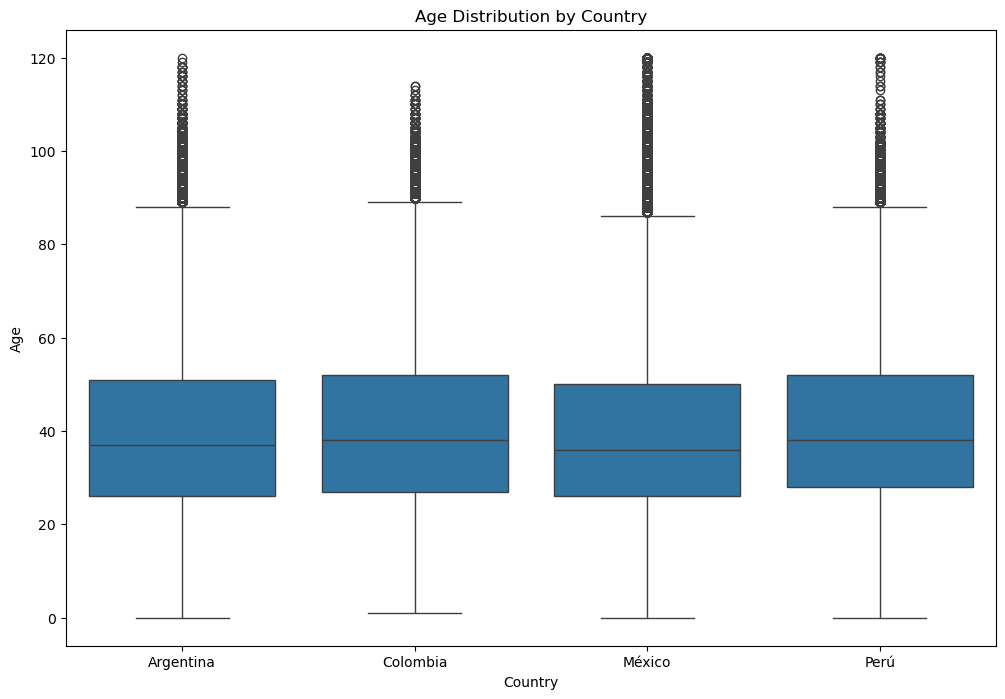

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='País', y='Edad', data=latam)
plt.title('Age Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Age')
plt.show()


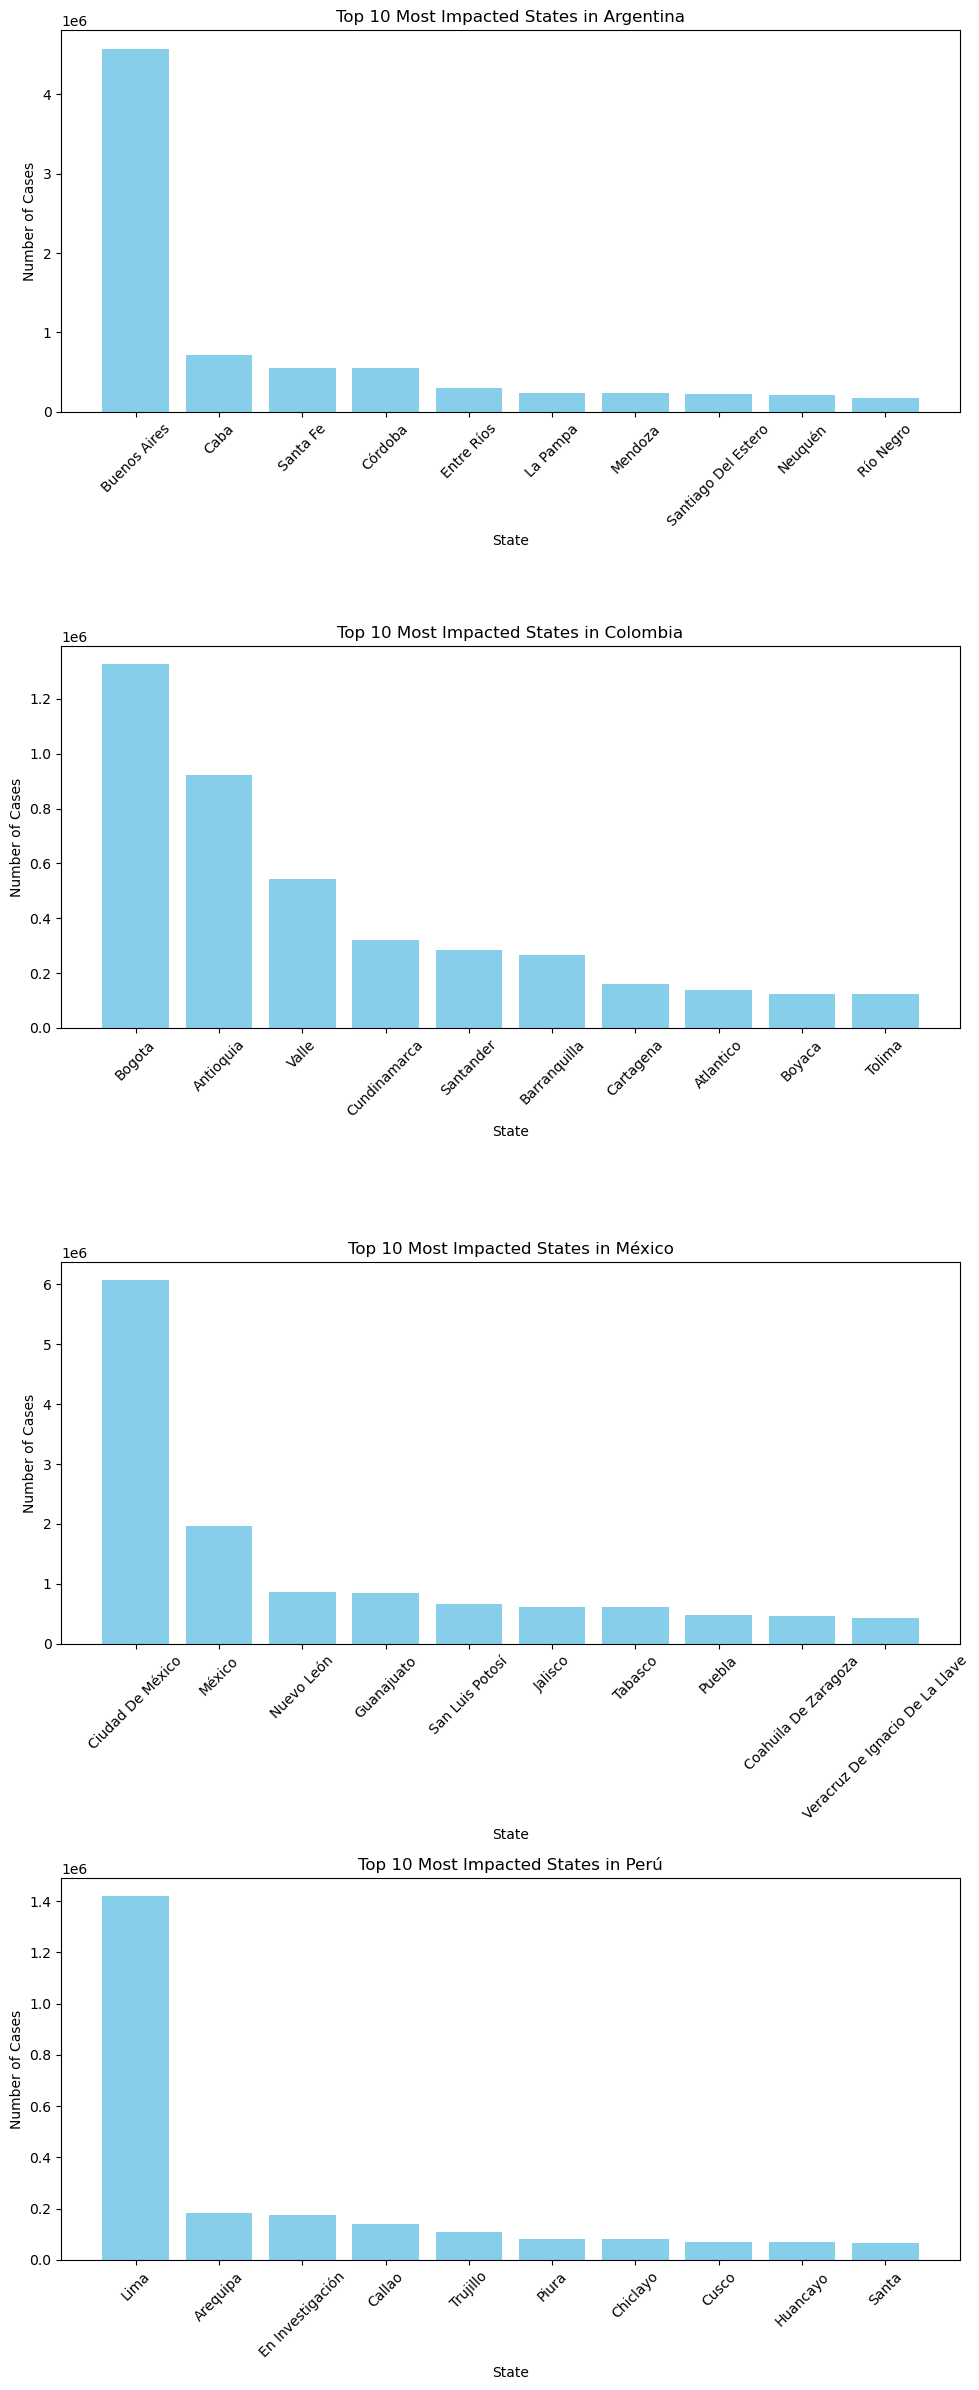

In [23]:
fig, axs = plt.subplots(len(countries), 1, figsize=(10, 6*len(countries)))

for i, country in enumerate(countries):
    data = latam[latam['País'] == country]['Estado'].value_counts().head(10)
    axs[i].bar(data.index, data.values, color='skyblue')
    axs[i].set_title(f'Top 10 Most Impacted States in {country}')
    axs[i].set_xlabel('State')
    axs[i].set_ylabel('Number of Cases')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Argentina: La Pampa, 22; Neuquén, 16; Río Negro, 15; Santiago del Estero, 10
# Perú: Callao, 11
# Colombia: Tolina, 13; Boyacá, 15
# México: SLP, 19; Tabasco: 21, Coahuila, 15

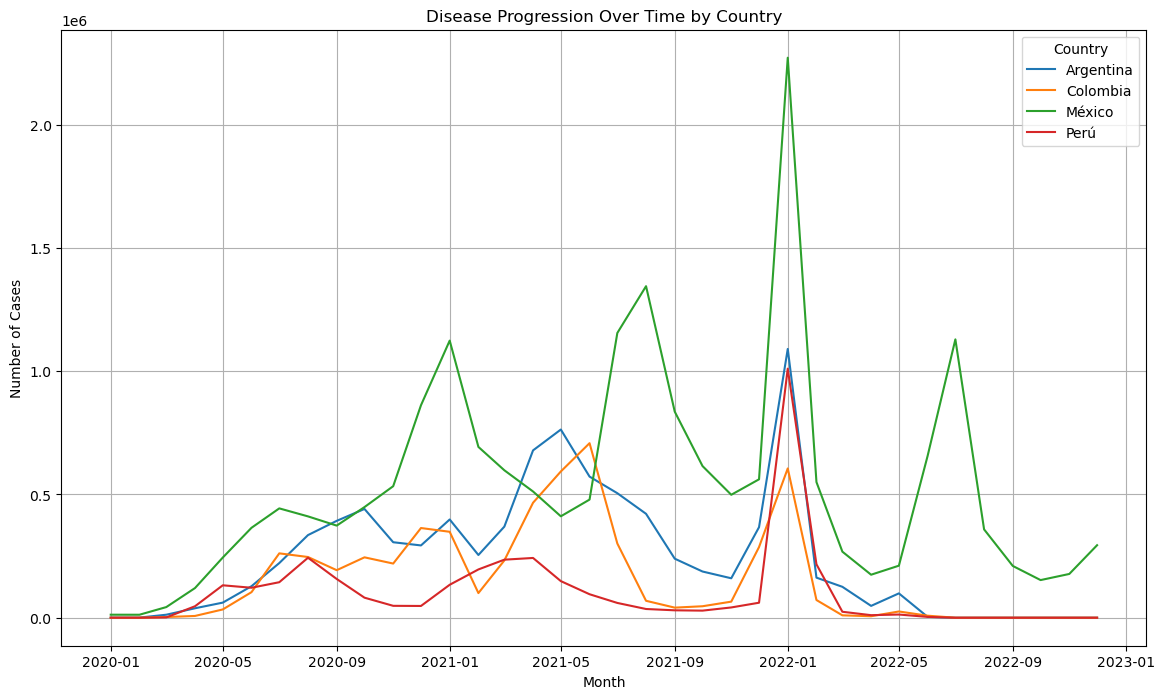

In [24]:
latam['Month'] = latam['Fecha de inicio de síntomas'].dt.to_period('M')
disease_progression = latam.groupby(['Month', 'País']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))

for country in disease_progression.columns:
    plt.plot(disease_progression.index.to_timestamp(), disease_progression[country], label=country)

plt.title('Disease Progression Over Time by Country')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.legend(title='Country')
plt.grid(True)
plt.show()

In [25]:
central_tendency_dispersion = latam.groupby('País')['Edad'].agg(['mean', 'median', 'std', 'var', 'min', 'max'])
print(central_tendency_dispersion)

                mean  median        std         var  min    max
País                                                           
Argentina  38.916259    37.0  18.831327  354.618876  0.0  120.0
Colombia   39.952881    38.0  18.295637  334.730325  1.0  114.0
México     38.231725    36.0  17.261813  297.970188  0.0  120.0
Perú       40.382321    38.0  17.486469  305.776591  0.0  120.0
